In [1]:
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew

import datetime as dt
from sklearn.preprocessing import Imputer

%matplotlib inline

In [2]:
bank_df = pd.read_excel(r'dataset_2011_2015_q2_1.xlsx',
                       sheetname='Dataset')


In [3]:
bank_df.head()

,id,period,source_code,source_name,source_region,source_income,source_lending,source_G8G20,destination_code,destination_name,...,cc2 lcu fx rate,cc2 fx margin,cc2 total cost %,inter lcu bank fx,transparent,note1,note2,coverage,pick-up method,date
0,13123,2011_1Q,AUS,Australia,..,High income: OECD,..,G20,FJI,Fiji,...,1.770000,3.29,5.29,1.83024,yes,NaN,NaN,Nationwide,Cash,24/Jan/2011
1,13129,2011_1Q,AUS,Australia,..,High income: OECD,..,G20,FJI,Fiji,...,1.767737,3.42,5.82,1.83024,yes,NaN,NaN,Nationwide,Cash,24/Jan/2011
2,13128,2011_1Q,AUS,Australia,..,High income: OECD,..,G20,FJI,Fiji,...,1.750000,4.38,7.38,1.83024,yes,NaN,NaN,Nationwide,Cash,24/Jan/2011
3,13127,2011_1Q,AUS,Australia,..,High income: OECD,..,G20,FJI,Fiji,...,1.791400,2.12,6.12,1.83024,yes,NaN,NaN,Nationwide,Bank Account,24/Jan/2011
4,13135,2011_1Q,AUS,Australia,..,High income: OECD,..,G20,FJI,Fiji,...,1.764200,3.61,7.61,1.83024,yes,NaN,NaN,Nationwide,Bank Account,24/Jan/2011


In [4]:
bank_df.describe()

  RuntimeWarning)


,id,cc1 lcu amount,cc1 denomination amount,cc1 lcu fee,cc1 lcu fx rate,cc1 fx margin,cc1 total cost %,cc2 lcu amount,cc2 denomination amount,cc2 lcu fee,cc2 lcu fx rate,cc2 fx margin,cc2 total cost %,inter lcu bank fx
count,39853.000000,39750.000000,39773.000000,39847.000000,39853.000000,39852.000000,39853.000000,39852.000000,39775.000000,39730.000000,39644.000000,39752.000000,39751.000000,39853.000000
mean,26790.166386,9394.382156,200.000025,1063.705353,373.959745,1.785430,8.652767,23318.896762,500.000075,1194.615528,370.632236,1.785907,5.147292,382.819580
std,14876.331816,46041.976589,0.005014,7867.826622,2104.899846,2.344927,6.588614,114557.836297,0.008684,8182.159794,2087.539747,2.344367,3.579412,2158.719017
min,1.000000,120.000000,200.000000,0.000000,0.000300,-16.580000,-8.970000,0.000000,500.000000,0.000000,0.000300,-16.580000,-13.420000,0.000310
25%,14084.000000,NaN,NaN,NaN,1.000000,NaN,4.250000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,29813.000000,NaN,NaN,NaN,2.740000,NaN,6.910000,NaN,NaN,NaN,NaN,NaN,NaN,2.826500
75%,39796.000000,NaN,NaN,NaN,43.360000,NaN,11.180000,NaN,NaN,NaN,NaN,NaN,NaN,44.330000
max,49754.000000,324500.000000,201.000000,146025.000000,28662.686000,36.050000,75.000000,811000.000000,501.000000,145980.000000,28662.686000,36.050000,42.650000,29667.100000


In [5]:
bank_df.columns

Index(['id', 'period', 'source_code', 'source_name', 'source_region',
       'source_income', 'source_lending', 'source_G8G20', 'destination_code',
       'destination_name', 'destination_region', 'destination_income',
       'destination_lending', 'destination_G8G20', 'firm', 'firm_type',
       'product', 'sending location', 'speed actual', 'cc1 lcu amount',
       'cc1 denomination amount', 'cc1 lcu code', 'cc1 lcu fee',
       'cc1 lcu fx rate', 'cc1 fx margin', 'cc1 total cost %',
       'cc2 lcu amount', 'cc2 denomination amount', 'cc2 lcu code',
       'cc2 lcu fee', 'cc2 lcu fx rate', 'cc2 fx margin', 'cc2 total cost %',
       'inter lcu bank fx', 'transparent', 'note1', 'note2', 'coverage',
       'pick-up method', 'date'],
      dtype='object')

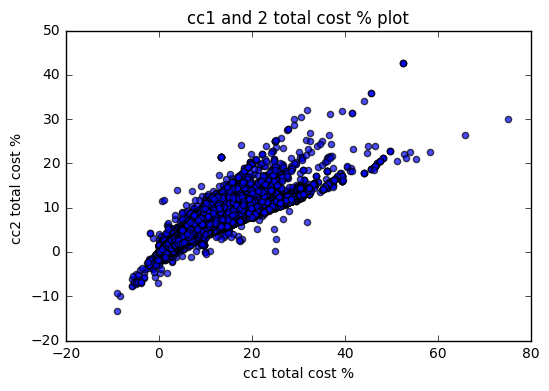

In [6]:
plt.scatter(bank_df['cc1 total cost %'], bank_df['cc2 total cost %'], 
            alpha=0.7)
plt.xlabel('cc1 total cost %')
plt.ylabel('cc2 total cost % ')
plt.title('cc1 and 2 total cost % plot')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B5B1DA0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C1644A8>]], dtype=object)

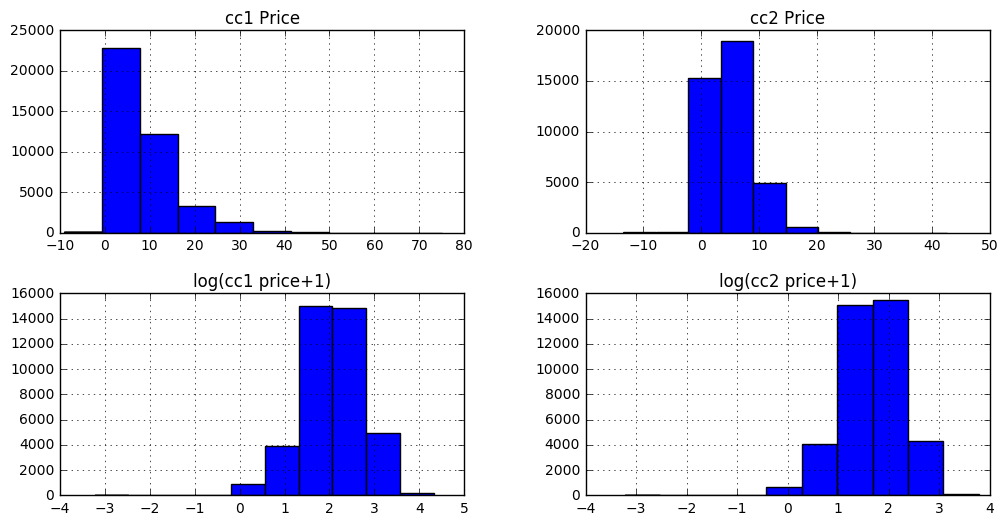

In [7]:
# log transform to make the target more normal
matplotlib.rcParams['figure.figsize'] = (12, 6)
prices = pd.DataFrame({'cc1 Price': bank_df['cc1 total cost %'], 
                      'log(cc1 price+1)': np.log1p(bank_df['cc1 total cost %']),
                      'cc2 Price': bank_df['cc2 total cost %'], 
                      'log(cc2 price+1)': np.log1p(bank_df['cc2 total cost %'])})
prices.hist()

In [8]:
#bank_df.loc[bank_df['cc1 total cost %']<0]['cc1 total cost %']
bank_df = bank_df.drop(bank_df.loc[bank_df['cc1 total cost %']<0].index)
bank_df = bank_df.drop(bank_df.loc[bank_df['cc2 total cost %']<0].index)

In [9]:
# log transform skewed numeric feature
numeric_feats = bank_df.dtypes[bank_df.dtypes != object].index
skewed_feats = bank_df[numeric_feats].apply(lambda x: skew(x.dropna()))  # compute skewness
skewed_feats = skewed_feats[skewed_feats > .75]
skewed_feats = skewed_feats.index
skewed_feats

Index(['cc1 lcu amount', 'cc1 denomination amount', 'cc1 lcu fee',
       'cc1 lcu fx rate', 'cc1 fx margin', 'cc1 total cost %',
       'cc2 lcu amount', 'cc2 denomination amount', 'cc2 lcu fee',
       'cc2 lcu fx rate', 'cc2 fx margin', 'cc2 total cost %',
       'inter lcu bank fx'],
      dtype='object')

In [10]:
bank_df[skewed_feats] = np.log1p(bank_df[skewed_feats])

In [11]:
price_cc1 = bank_df['cc1 total cost %']
price_cc2 = bank_df['cc2 total cost %']

In [12]:
# drop two features with large amount of missing values
bank_df = bank_df.drop(['note1', 'note2'], axis=1)

In [13]:
bank_df.drop(['source_code', 'destination_code'], axis=1, inplace=True)
bank_df['destination_region'] = bank_df['destination_region'].replace({'..': 'Other'})
bank_df.drop(['source_region', 'source_lending', 'cc1 denomination amount', 'cc2 denomination amount'], axis=1, inplace=True)


In [14]:
bank_df['date'] = pd.to_datetime(bank_df['date'])
bank_df['date']=bank_df['date'].map(dt.datetime.toordinal)
bank_df['date'] = (bank_df['date'] - bank_df['date'].mean()) / np.std(bank_df['date'])


In [18]:
bank_df.drop(['id', 'cc1 total cost %', 'cc2 total cost %', 'cc2 lcu amount', 'cc2 lcu fee', 'cc2 lcu fx rate', 'cc2 fx margin', 'cc2 total cost %'], axis=1, inplace=True)
bank_df.drop(['firm', 'pick-up method'], axis = 1, inplace=True)
bank_df.drop(['cc1 lcu code'], axis = 1, inplace=True)
bank_df.drop(['source_name', 'cc2 lcu code', 'destination_name'], axis = 1, inplace=True)

In [19]:
bank_df.shape

(39643, 19)

In [20]:
bank_df.columns

Index(['period', 'source_income', 'source_G8G20', 'destination_region',
       'destination_income', 'destination_lending', 'destination_G8G20',
       'firm_type', 'product', 'sending location', 'speed actual',
       'cc1 lcu amount', 'cc1 lcu fee', 'cc1 lcu fx rate', 'cc1 fx margin',
       'inter lcu bank fx', 'transparent', 'coverage', 'date'],
      dtype='object')

In [21]:
bank_df['destination_lending'].value_counts()

IBRD     24140
IDA       9605
Blend     5350
..         548
Name: destination_lending, dtype: int64

In [22]:
bank_df = pd.get_dummies(bank_df)

In [23]:
bank_df[bank_df==-np.inf]=0
bank_df = bank_df.fillna(bank_df.mean())

In [24]:
bank_df.head()

,cc1 lcu amount,cc1 lcu fee,cc1 lcu fx rate,cc1 fx margin,inter lcu bank fx,date,period_2011_1Q,period_2011_3Q,period_2012_1Q,period_2012_3Q,...,speed actual_Less than one hour,speed actual_Next day,speed actual_Same day,transparent_no,transparent_yes,coverage_Main city,coverage_Major cities,coverage_Nationwide,coverage_Rural only,coverage_Urban only
0,5.303305,2.484907,1.018847,1.456287,1.040362,-2.041133,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,5.303305,2.564949,1.018030,1.486140,1.040362,-2.041133,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,5.303305,2.772589,1.011601,1.682688,1.040362,-2.041133,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,5.303305,3.044522,1.026543,1.137833,1.040362,-2.041133,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5.303305,3.044522,1.016751,1.528228,1.040362,-2.041133,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [57]:
import sklearn
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, ElasticNet, LassoCV, Lasso
from math import sqrt

In [26]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, bank_df, price_cc1, 
                                    scoring='mean_squared_error', cv=5))
    return rmse

In [33]:
# Ridge Regession
model_ridge = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha=alpha)).mean() for alpha in alphas]
for i in range(len(alphas)):
    print (alphas[i], cv_ridge[i])

0.05 0.281564402097
0.1 0.28094100407
0.3 0.279227722308
1 0.277085974493
3 0.276602129563
5 0.276811509543
10 0.27712003674
15 0.277213604142
30 0.277195862558
50 0.277095656731
75 0.277012961066


Ridge regression has alpha 3 and rmse = 0.2766

In [37]:
# Lasso Regression
alphas = [1, 0.001, 0.0001, 0.0005, 0.0003]
model_lasso = LassoCV(alphas = alphas, max_iter = 10000, normalize= True).fit(bank_df, price_cc1)
cv_lasso = rmse_cv(model_lasso)
print (cv_lasso)

[ 0.27954525  0.2922525   0.29700625  0.310239    0.27869306]


In [38]:
# coefficients:
coef = pd.Series(model_lasso.coef_, index=bank_df.columns)

In [39]:
print ('Lasso picked features: ' + str(sum(coef!=0)) + ' features and eliminated the other ' 
       + str(sum(coef == 0)) + ' features.')

Lasso picked features: 18 features and eliminated the other 93 features.


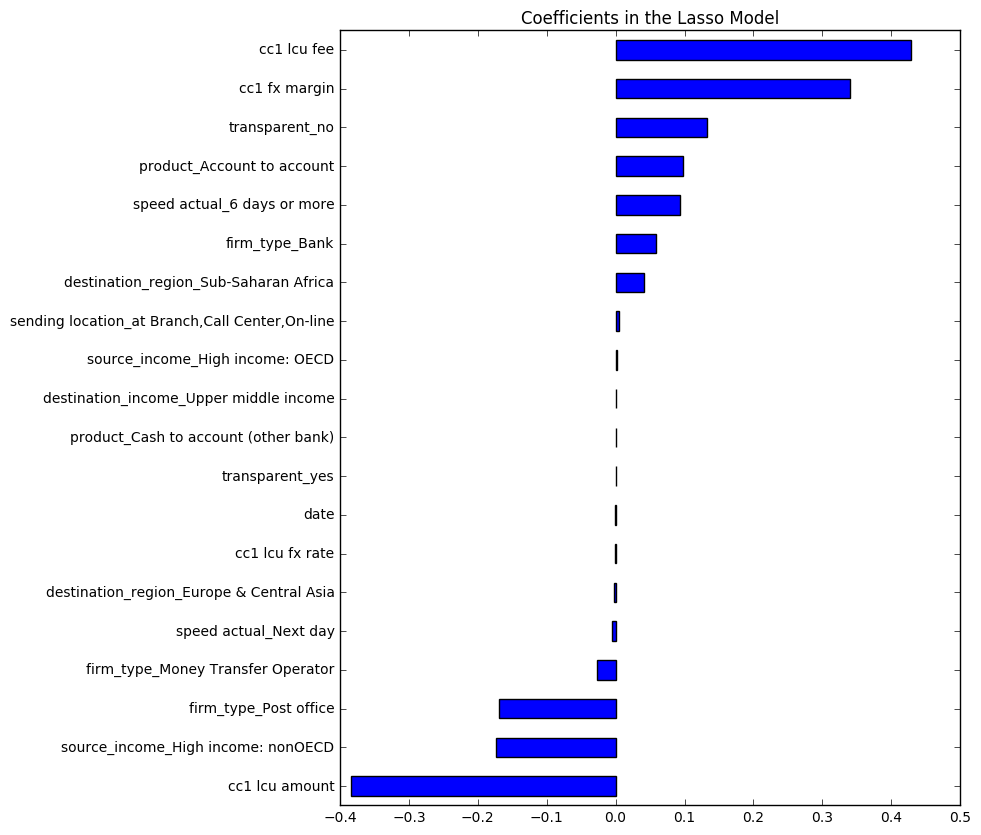

In [40]:
principal_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (8, 10)
principal_coef.plot(kind='barh')
plt.title('Coefficients in the Lasso Model')

In [44]:
seed = 7
kfold = KFold(bank_df.shape[0], n_folds = 10, random_state=seed)

# Ridge regression

In [48]:
model_ridge = Ridge(alpha=3) # alpha = 3 is based on the previous calculation
model_ridge.fit(bank_df, price_cc1)
#pred_test = model_ridge.predict(X_test)
results = cross_validation.cross_val_score(model_ridge, bank_df, price_cc1, cv=kfold)
print (results.mean())

0.827424496197


# Lasso Regression

In [49]:
model_lasso = Lasso(alpha=0.001)
model_lasso.fit(bank_df, price_cc1)
results = cross_validation.cross_val_score(model_lasso, bank_df, price_cc1, cv=kfold)
print (results.mean())

0.824476957946


# ElasticNet Regression

In [53]:
model_elastic = ElasticNet(alpha=0.01)
model_elastic.fit(bank_df, price_cc1)
results = cross_validation.cross_val_score(model_elastic, bank_df, price_cc1, cv=kfold)
print (results.mean())

0.816175423416


# Ensemble method

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
seed = 7
kfold = KFold(bank_df.shape[0], n_folds = 10, random_state=seed)


In [ ]:
cart = DecisionTreeRegressor()

In [ ]:
num_trees = 100
model = BaggingRegressor(base_estimator=cart, n_estimators=num_trees, random_state=seed)
result = cross_validation.cross_val_score(model, bank_df, price_cc1, cv=kfold)
print (result.mean())

# Random Forest Regression

In [54]:
num_trees = 100
max_features = 10
rf_model = RandomForestRegressor(n_estimators=num_trees, max_features=max_features)
results = cross_validation.cross_val_score(rf_model, bank_df, price_cc1, cv=kfold)


In [56]:
print (results.mean())

0.952055050675


# Boosting Algorithms

In [58]:
# AdaBoost AdaBoostRegressor
num_trees = 100
adabr_model = AdaBoostRegressor(n_estimators=num_trees, random_state=0)
results = cross_validation.cross_val_score(adabr_model, bank_df, price_cc1, cv=kfold)
print (results.mean())

0.65225355977


# GradentBoostingRegressor

In [63]:
gbr_model = GradientBoostingRegressor(n_estimators=num_trees, random_state=0)
results = cross_validation.cross_val_score(gbr_model, bank_df, price_cc1, cv=kfold)
print (results.mean())

0.957146965113


In [65]:
gbr_model.fit(bank_df, price_cc1)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=0, subsample=1.0, verbose=0,
             warm_start=False)

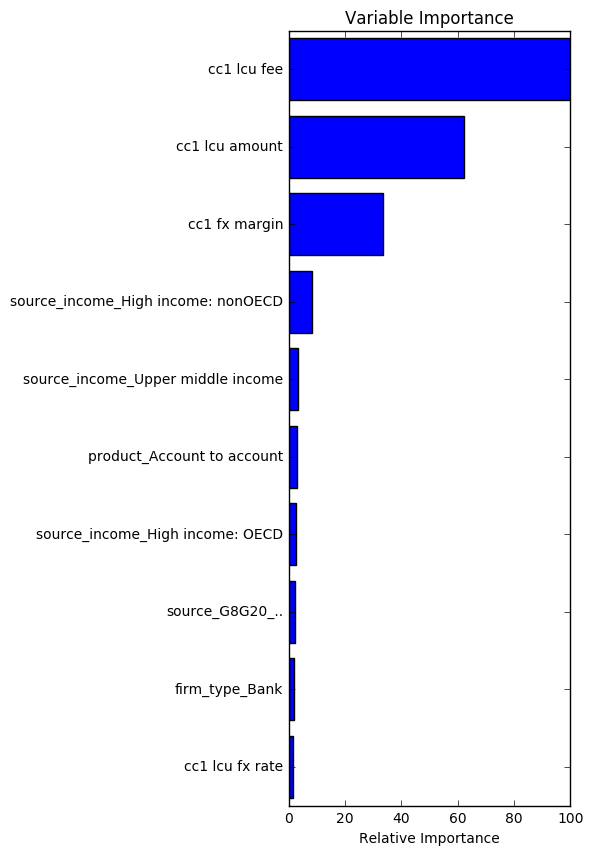

In [66]:
# top 10 importance variables
feature_importance = gbr_model.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
#pos = np.arange(sorted_idx.shape[0]) + .5
pos = np.arange(10)+.5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx][-10:], align='center')
plt.yticks(pos, bank_df.columns[sorted_idx][-10:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
feature_importance[sorted_idx][sorted_idx.shape[0]-10:]